<a href="https://colab.research.google.com/github/KoushaAm/MachineLearning/blob/main/ClassificationExtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons


In [ ]:
x, y = make_moons(n_samples = 500, noise = 0.2)

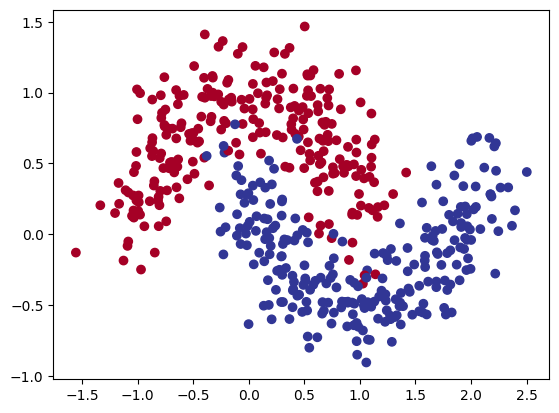

In [ ]:
plt.scatter(x[:, 0], x[:, 1],c=y, cmap = plt.cm.RdYlBu)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25,
                                                    random_state = 42)


x_train.shape, x_test.shape,  y_train.shape, y_test.shape

((375, 2), (125, 2), (375,), (125,))

In [ ]:
#check format
x_train[0]
len(x_train)

#[375 [2]]

375

In [ ]:
def plot_decision_boundary (model, x, y) : 
  # define axis boundaries

  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  # partition the into
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  

  # concatenate the xx with yy elemtns [[x1, x2], [x1, x2] , ...]
  x_in = np.c_[xx.ravel(), yy.ravel()]


  # predict given pair of coordinates 
  y_pred = model.predict(x_in)

  #check for multi-class
  if (len(y_pred[0]) > 1): 
    print ("doing multiclass classificaiton")

  else: 
    print ("doing binary classificaiton")
    
    y_pred = np.round(y_pred).reshape(xx.shape)

    #plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)

    plt.scatter(x[:, 0], x[:, 1], c = y, s = 40, cmap=plt.cm.RdYlBu)

    plt.xlim(xx.min(), xx.max())

    plt.xlim(yy.min(), yy.max())


In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = "relu"), 
    tf.keras.layers.Dense(3, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])


history1 = model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 3ms/step - loss: 0.6620 - accuracy: 0.6240
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6267
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6320
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6267
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6213
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6267
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6373
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6427
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6400
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6212 - accuracy: 0.6400
Epoch 11/

In [ ]:
model1.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8400


[0.393086314201355, 0.8399999737739563]

313/313 [==============================] - 1s 1ms/step
doing binary classificaiton


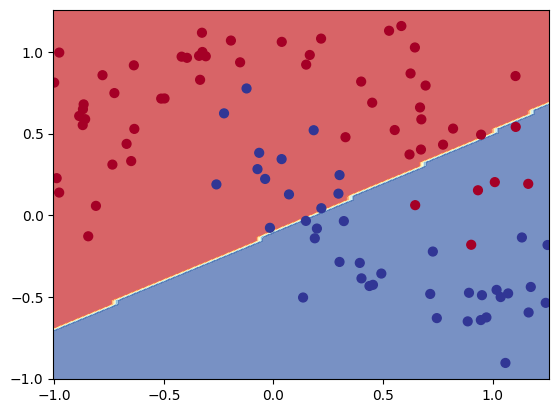

In [ ]:
plot_decision_boundary(model1, x_test,y_test)

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(4, activation = "relu"), 
     tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])


history2 = model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 5ms/step - loss: 0.7368 - accuracy: 0.3760
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7220 - accuracy: 0.2853
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.2187
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.3653
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.4800
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5067
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5067
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5067
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.5067
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6267
Epoch 11/

In [ ]:
model2.evaluate(x_test, y_test)

4/4 [==============================] - 1s 9ms/step - loss: 0.2491 - accuracy: 0.9280


[0.24912706017494202, 0.9279999732971191]

313/313 [==============================] - 1s 2ms/step
doing binary classificaiton


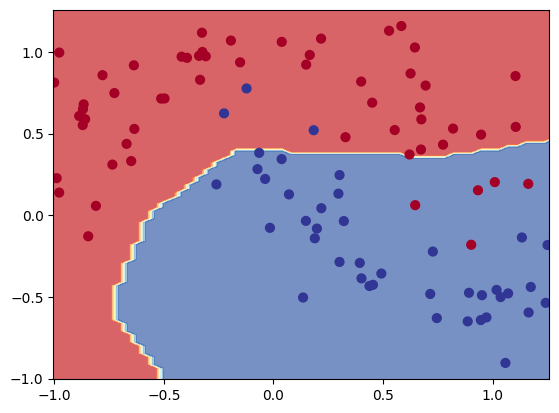

In [ ]:
plot_decision_boundary(model2, x_test, y_test)

Epoch 1/100
12/12 [==============================] - 2s 3ms/step - loss: 0.7097 - accuracy: 0.3840 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4667 - lr: 0.0011
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6853 - lr: 0.0013
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.8160 - lr: 0.0014
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.8747 - lr: 0.0016
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.8773 - lr: 0.0018
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.8480 - lr: 0.0020
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.8480 - lr: 0.0022
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8693 - lr:

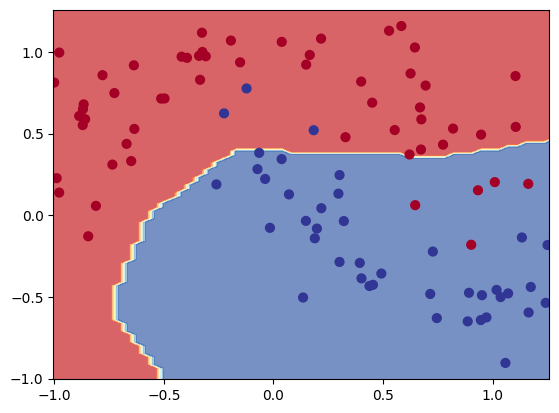

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation = "tanh"), 
    tf.keras.layers.Dense(6, activation = "tanh"), 
    tf.keras.layers.Dense(6, activation = "tanh"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))


history3 = model3.fit(x_train, y_train, epochs=100, callbacks=lr_schedular)

plot_decision_boundary(model2, x_test, y_test)

In [ ]:
model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 11.8914 - accuracy: 0.5200


[11.8914213180542, 0.5199999809265137]

# Improved learning rate

In [ ]:
ideal_lr = 0.08

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation = "tanh"), 
    tf.keras.layers.Dense(6, activation = "tanh"), 
    tf.keras.layers.Dense(6, activation = "tanh"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05), 
              metrics = ['accuracy'])



history4 = model4.fit(x_train, y_train, epochs=100)

plot_decision_boundary(model2, x_test, y_test)

**conclusion**: check lr callback to identify the best lr

In [ ]:
plot_decision_boundary(model2, x_test, y_test)